<a href="https://colab.research.google.com/github/komalswami/tenserflow/blob/master/kerassyntaxbasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import lib

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
#import data

In [0]:
df=pd.read_csv('fake_reg.csv')

In [116]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [0]:
#train_test_split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=df[['feature1','feature2']]
y=df['price'].values

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [0]:
#nomalizing / scaling the data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler=MinMaxScaler()

In [123]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [0]:
#creating model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [0]:
model=Sequential()
model.add(Dense(2))
model.add(Dense(1))

In [0]:
model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

In [0]:
model.compile(optimizer='rmsprop',loss='mse')

In [130]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256502.4531
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256395.9062
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256322.3438
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256062.4062
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256018.2969
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255910.0469
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255603.7969
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255536.6562
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255207.8125
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254932.8906
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254423.9062
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

In [0]:
#evaluation

In [132]:
model.history.history

{'loss': [256502.453125,
  256395.90625,
  256322.34375,
  256062.40625,
  256018.296875,
  255910.046875,
  255603.796875,
  255536.65625,
  255207.8125,
  254932.890625,
  254423.90625,
  254405.390625,
  253989.5625,
  253637.4375,
  253098.90625,
  252836.546875,
  252293.15625,
  251719.90625,
  251241.515625,
  250508.859375,
  249986.734375,
  249289.546875,
  248604.296875,
  247650.640625,
  246878.796875,
  245919.796875,
  244766.34375,
  243803.34375,
  242729.84375,
  241561.0,
  240227.984375,
  238930.265625,
  237396.015625,
  236024.296875,
  234305.6875,
  232782.296875,
  230807.484375,
  229115.25,
  227153.296875,
  225105.546875,
  222857.953125,
  220690.0,
  218446.546875,
  215809.046875,
  213263.09375,
  210695.015625,
  207811.0,
  204871.0625,
  201961.515625,
  198919.25,
  195708.9375,
  192352.9375,
  188902.578125,
  185232.484375,
  181675.390625,
  177803.3125,
  174004.6875,
  169899.328125,
  165637.546875,
  161494.25,
  157268.390625,
  152853.437

In [0]:
loss=model.history.history['loss']

Text(0.5, 1.0, 'Training loss per epoche')

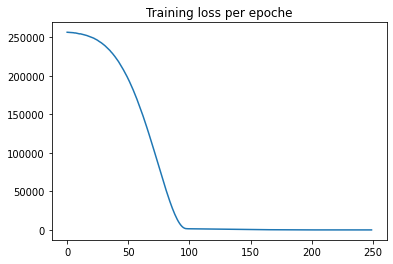

In [134]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title('Training loss per epoche')

In [0]:
#compare finale evaluation (MSE) on training set and test set

In [136]:
model.metrics_names

['loss']

In [0]:

training_score=model.evaluate(X_train,y_train,verbose=0)

In [138]:
training_score

25.06017303466797

In [139]:
test_score=model.evaluate(X_test,y_test,verbose=0)
test_score

28.11538314819336

In [0]:
predictions=model.predict(X_test)

In [141]:
predictions

array([[406.5379 ],
       [625.2562 ],
       [593.7682 ],
       [573.8617 ],
       [367.83734],
       [580.8091 ],
       [516.59045],
       [460.4496 ],
       [550.8304 ],
       [448.83252],
       [613.4759 ],
       [550.4473 ],
       [420.38202],
       [410.13873],
       [652.96014],
       [438.6007 ],
       [509.87607],
       [661.77405],
       [664.4045 ],
       [567.10767],
       [335.352  ],
       [446.17053],
       [383.74695],
       [379.94388],
       [568.1937 ],
       [612.3104 ],
       [533.9203 ],
       [429.15182],
       [657.2625 ],
       [415.327  ],
       [443.94336],
       [486.54755],
       [439.72974],
       [683.71564],
       [426.01184],
       [418.98477],
       [503.32397],
       [552.03094],
       [511.249  ],
       [396.6371 ],
       [620.2854 ],
       [417.885  ],
       [606.11523],
       [447.25647],
       [503.44626],
       [583.2827 ],
       [670.7711 ],
       [491.81244],
       [319.61615],
       [486.85315],


In [0]:
pred_df=pd.DataFrame(y_test,columns=['Test Y'])

In [143]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [0]:
pred = pd.Series(predictions.reshape(300,))

In [146]:
pred

0      406.537903
1      625.256226
2      593.768188
3      573.861694
4      367.837341
          ...    
295    530.583618
296    516.906616
297    611.332153
298    418.202118
299    412.157288
Length: 300, dtype: float32

In [0]:
pred_df=pd.concat([pred_df,pred],axis=1)

In [148]:
pred_df

,Test Y,0
0,402.296319,406.537903
1,624.156198,625.256226
2,582.455066,593.768188
3,578.588606,573.861694
4,371.224104,367.837341
...,...,...
295,525.704657,530.583618
296,502.909473,516.906616
297,612.727910,611.332153
298,417.569725,418.202118


In [0]:
pred_df.columns=['Test Y','Model Predictions']

In [150]:
pred_df

,Test Y,Model Predictions
0,402.296319,406.537903
1,624.156198,625.256226
2,582.455066,593.768188
3,578.588606,573.861694
4,371.224104,367.837341
...,...,...
295,525.704657,530.583618
296,502.909473,516.906616
297,612.727910,611.332153
298,417.569725,418.202118


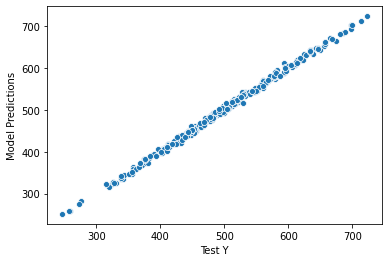

In [152]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [0]:
pred_df['Error']=pred_df['Test Y']-pred_df['Model Predictions']

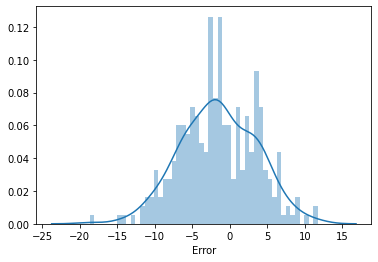

In [154]:
sns.distplot(pred_df['Error'],bins=50)

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [156]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.2538475216304725

In [157]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

27.45189450359395

In [158]:
test_score

28.11538314819336

In [159]:
test_score**0.05

1.1815366575895931

In [0]:
#predicting new data

In [0]:
new_gem=[[998,1000]]

In [162]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [0]:
new_gem=scaler.transform(new_gem)

In [164]:
model.predict(new_gem)

array([[421.0174]], dtype=float32)

In [0]:
#saving and loading model

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('my_model.h5') 

In [169]:
later_model = load_model('my_model.h5')

In [170]:
later_model.predict(new_gem)

array([[421.0174]], dtype=float32)